In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries

In [11]:
API_key = 'O7H7PGIRYSCDC6M1'
class ScriptData:
    def __init__(self, API_key):
        self.Api_key = API_key
        
    def fetch_intraday_data(self, script,timeperiod="5min"):
        self.script  = script
        self.timeperiod = timeperiod
        ts = TimeSeries(key = self.Api_key,output_format='pandas')
        data = ts.get_intraday(self.script,interval=self.timeperiod)
        return data
    def convert_intraday_data(self, script):
        self.script  = script
        data = self.fetch_intraday_data(script)
        df = pd.DataFrame(data[0])
        df.reset_index(inplace=True)
        df.columns = ['timestamp','open','high','low','close','volume']
        df['volume'] = df['volume'].astype(int)
        return df
def indicator1(data, timeperiod):
    indicator = data[['timestamp','close']]
    indicator['indicator'] = indicator.rolling(timeperiod).mean()
    indicator.drop(['close'],axis=1,inplace=True)
    return indicator

In [12]:
scriptdata = ScriptData(API_key)

In [13]:
scriptdata.fetch_intraday_data("GOOGL")

(                     1. open    2. high   3. low  4. close  5. volume
 date                                                                 
 2021-12-23 20:00:00  2938.00  2938.0000  2938.00  2938.000      201.0
 2021-12-23 16:35:00  2934.29  2934.2900  2934.29  2934.290      191.0
 2021-12-23 16:25:00  2938.00  2938.0000  2938.00  2938.000      301.0
 2021-12-23 16:10:00  2938.33  2938.3300  2938.33  2938.330      293.0
 2021-12-23 16:05:00  2938.33  2938.3300  2938.00  2938.330    12194.0
 ...                      ...        ...      ...       ...        ...
 2021-12-22 15:45:00  2920.25  2921.1678  2919.34  2921.000    17360.0
 2021-12-22 15:40:00  2916.57  2921.1500  2915.36  2921.000    21780.0
 2021-12-22 15:35:00  2919.96  2919.9600  2916.20  2917.220    14181.0
 2021-12-22 15:30:00  2919.60  2920.6500  2918.70  2919.895     8721.0
 2021-12-22 15:25:00  2918.97  2919.7300  2917.49  2919.730     6537.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Intraday (5min) open, high, l

In [14]:
data = scriptdata.convert_intraday_data("GOOGL")
data

,timestamp,open,high,low,close,volume
0,2021-12-23 20:00:00,2938.00,2938.0000,2938.00,2938.000,201
1,2021-12-23 16:35:00,2934.29,2934.2900,2934.29,2934.290,191
2,2021-12-23 16:25:00,2938.00,2938.0000,2938.00,2938.000,301
3,2021-12-23 16:10:00,2938.33,2938.3300,2938.33,2938.330,293
4,2021-12-23 16:05:00,2938.33,2938.3300,2938.00,2938.330,12194
...,...,...,...,...,...,...
95,2021-12-22 15:45:00,2920.25,2921.1678,2919.34,2921.000,17360
96,2021-12-22 15:40:00,2916.57,2921.1500,2915.36,2921.000,21780
97,2021-12-22 15:35:00,2919.96,2919.9600,2916.20,2917.220,14181
98,2021-12-22 15:30:00,2919.60,2920.6500,2918.70,2919.895,8721


In [15]:
indicator = indicator1(data, timeperiod=5)
indicator

<ipython-input-11-23e74c1dcf26>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicator['indicator'] = indicator.rolling(timeperiod).mean()
C:\Users\91842\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,timestamp,indicator
0,2021-12-23 20:00:00,NaN
1,2021-12-23 16:35:00,NaN
2,2021-12-23 16:25:00,NaN
3,2021-12-23 16:10:00,NaN
4,2021-12-23 16:05:00,2937.390
...,...,...
95,2021-12-22 15:45:00,2925.476
96,2021-12-22 15:40:00,2924.016
97,2021-12-22 15:35:00,2921.774
98,2021-12-22 15:30:00,2920.249


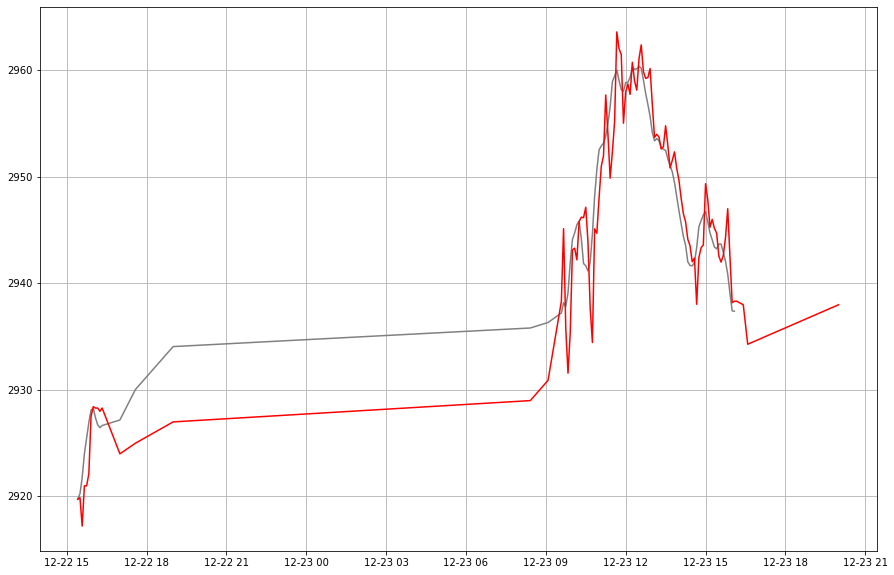

In [16]:
plt.figure(figsize=(15,10))
plt.plot(indicator.timestamp,indicator.indicator,color='grey')
plt.plot(data.timestamp,data.close,color='red')
plt.grid()

In [17]:
df = scriptdata.convert_intraday_data('GOOGL')
indicator = indicator1(df, timeperiod=5)

<ipython-input-11-23e74c1dcf26>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicator['indicator'] = indicator.rolling(timeperiod).mean()
C:\Users\91842\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df.columns = ['timestamp', 'open', 'high', 'low', 'close_data', 'volume']
indicator.columns = ['timestamp','indicator_data']
print(df)
print("")
print(indicator)

             timestamp     open       high      low  close_data  volume
0  2021-12-23 20:00:00  2938.00  2938.0000  2938.00    2938.000     201
1  2021-12-23 16:35:00  2934.29  2934.2900  2934.29    2934.290     191
2  2021-12-23 16:25:00  2938.00  2938.0000  2938.00    2938.000     301
3  2021-12-23 16:10:00  2938.33  2938.3300  2938.33    2938.330     293
4  2021-12-23 16:05:00  2938.33  2938.3300  2938.00    2938.330   12194
..                 ...      ...        ...      ...         ...     ...
95 2021-12-22 15:45:00  2920.25  2921.1678  2919.34    2921.000   17360
96 2021-12-22 15:40:00  2916.57  2921.1500  2915.36    2921.000   21780
97 2021-12-22 15:35:00  2919.96  2919.9600  2916.20    2917.220   14181
98 2021-12-22 15:30:00  2919.60  2920.6500  2918.70    2919.895    8721
99 2021-12-22 15:25:00  2918.97  2919.7300  2917.49    2919.730    6537

[100 rows x 6 columns]

             timestamp  indicator_data
0  2021-12-23 20:00:00             NaN
1  2021-12-23 16:35:00           

In [19]:
# Put Strategy class here
class Strategy(ScriptData):
    def __init__(self,script):
        self.Api_key = API_key
        self.script = script
    def get_script_data(self):
        df = self.convert_intraday_data(self.script)
        return df
    def get_signals(self):
        df = self.get_script_data()
        signals = pd.DataFrame()
        signals['timestamp'] = df['timestamp']
        signals['signal'] = np.nan
        df.columns = ['timestamp', 'open', 'high', 'low', 'close_data', 'volume']
        indicator.columns = ['timestamp','indicator_data']
        for i in range(1,len(df.index)-1):
            if (df.close_data[i+1] > indicator.indicator_data[i+1]) and (df.close_data[i-1] < indicator.indicator_data[i-1]):
                signals['signal'][i] = 'SELL'
            elif (df.close_data[i+1] < indicator.indicator_data[i+1]) and (df.close_data[i-1] > indicator.indicator_data[i-1]):   
                signals['signal'][i] = 'BUY'
            else:
                signals['signal'][i] = 'NO SIGNAL'
        signals['signal'] = signals['signal'].fillna('NO SIGNAL')  
        return signals
strategy = Strategy("GOOGL")
strategy.get_script_data()


<ipython-input-19-30e51b8406b3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][i] = 'NO SIGNAL'
C:\Users\91842\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-19-30e51b8406b3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][i] = 'BUY'
<ipython-input-19-30e51b8406b3>:18: SettingWithCop

NO SIGNAL    66
BUY          18
SELL         16
Name: signal, dtype: int64

In [21]:
strategy.get_signals()

<ipython-input-19-30e51b8406b3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][i] = 'NO SIGNAL'
<ipython-input-19-30e51b8406b3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][i] = 'BUY'
<ipython-input-19-30e51b8406b3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['signal'][i] = 'SELL'


KeyError: False